In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
os.chdir("/content/drive/My Drive/mini_project2")
os.getcwd()

'/content/drive/My Drive/mini_project2'

In [ ]:
# Load data
data_path = '/content/drive/My Drive/mini_project2/Historic_data.csv'
data = pd.read_csv(data_path)
print("First few rows of the data:")
print(data.head())

First few rows of the data:
         Date  Price    Open    High    Low     Vol.  Unnamed: 6
0  12/29/2023  170.0  164.50  170.00  164.5   69.03K         NaN
1  12/28/2023  166.5  167.00  167.00  166.5    2.03K         NaN
2  12/27/2023  165.0  165.25  165.25  164.0    7.09K         NaN
3  12/22/2023  165.0  166.00  168.00  164.0  259.08K         NaN
4  12/21/2023  167.0  165.00  168.00  165.0  134.72K         NaN


In [ ]:
# Handle missing values
data.dropna(inplace=True)

# Convert 'Vol' column to numeric
data['Vol.'] = data['Vol.'].str.replace('K', 'e3').str.replace('M', 'e6').astype(float)

# Select relevant features
features = ['Open', 'High', 'Low', 'Vol.']  # Select relevant features
data = data[features]

# Check the shape of the data after handling missing values and selecting features
print("\nShape of the data after preprocessing:")
print(data.shape)


Shape of the data after preprocessing:
(1163, 4)


Epoch 1/100
30/30 [==============================] - 4s 7ms/step - loss: 0.0053
Epoch 2/100
30/30 [==============================] - 0s 7ms/step - loss: 0.0050
Epoch 3/100
30/30 [==============================] - 0s 7ms/step - loss: 0.0050
Epoch 4/100
30/30 [==============================] - 0s 7ms/step - loss: 0.0050
Epoch 5/100
30/30 [==============================] - 0s 7ms/step - loss: 0.0049
Epoch 6/100
30/30 [==============================] - 0s 7ms/step - loss: 0.0050
Epoch 7/100
30/30 [==============================] - 0s 8ms/step - loss: 0.0050
Epoch 8/100
30/30 [==============================] - 0s 7ms/step - loss: 0.0049
Epoch 9/100
30/30 [==============================] - 0s 7ms/step - loss: 0.0050
Epoch 10/100
30/30 [==============================] - 0s 7ms/step - loss: 0.0050
Epoch 11/100
30/30 [==============================] - 0s 7ms/step - loss: 0.0051
Epoch 12/100
30/30 [==============================] - 0s 8ms/step - loss: 0.0049
Epoch 13/100
30/30 [=================

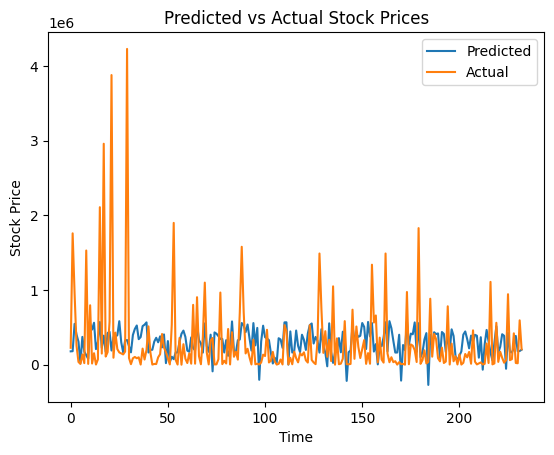

In [ ]:
# Normalize features
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Split data into features and target variable
X = data_scaled[:, :-1]  # Features
y = data_scaled[:, -1]  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Construct LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Make predictions for test data
predictions = model.predict(X_test)

# Rescale predictions and actual values
predictions = scaler.inverse_transform(np.concatenate((X_test[:,:,0], predictions), axis=1))[:, -1]
y_test = scaler.inverse_transform(np.concatenate((X_test[:,:,0], y_test.reshape(-1,1)), axis=1))[:, -1]

# Compute RMSE for test data
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("Root Mean Squared Error (RMSE) for Test Data:", rmse)

# Visualize the predicted values
plt.plot(predictions, label='Predicted')
plt.plot(y_test, label='Actual')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Predicted vs Actual Stock Prices')
plt.show()

In [ ]:
# Define the error margin threshold (e.g., 5%)
error_margin = 0.05

# Calculate the absolute error between predicted and actual values
absolute_errors = np.abs(predictions - y_test)

# Count the number of predictions within the error margin
within_margin_count = np.sum(absolute_errors <= error_margin)

# Calculate the accuracy as the percentage of predictions within the error margin
accuracy = (within_margin_count / len(y_test)) * 100

print("Accuracy within {}% error margin: {:.2f}%".format(error_margin * 100, accuracy))


Accuracy within 5.0% error margin: 0.00%


30/30 [==============================] - 0s 3ms/step
Root Mean Squared Error (RMSE) for Training Data: 690572.7422374683


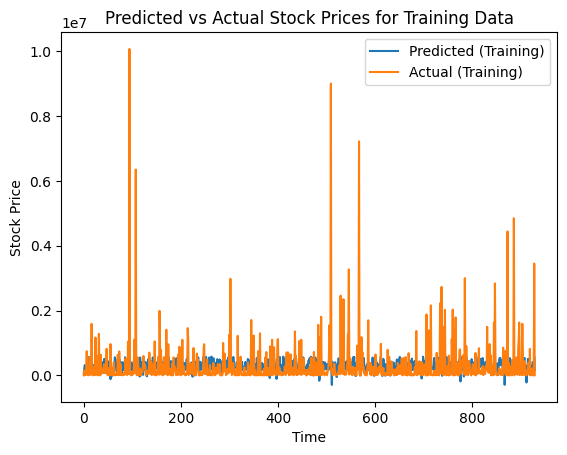

In [ ]:
# Make predictions for training data
train_predictions = model.predict(X_train)

# Rescale predictions and actual values for training data
train_predictions = scaler.inverse_transform(np.concatenate((X_train[:,:,0], train_predictions), axis=1))[:, -1]
y_train_rescaled = scaler.inverse_transform(np.concatenate((X_train[:,:,0], y_train.reshape(-1,1)), axis=1))[:, -1]

# Compute RMSE for training data
train_rmse = np.sqrt(mean_squared_error(y_train_rescaled, train_predictions))
print("Root Mean Squared Error (RMSE) for Training Data:", train_rmse)

# Visualize the predicted values for training data
plt.plot(train_predictions, label='Predicted (Training)')
plt.plot(y_train_rescaled, label='Actual (Training)')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Predicted vs Actual Stock Prices for Training Data')
plt.show()


8/8 [==============================] - 0s 10ms/step
Root Mean Squared Error (RMSE) for Year 1: 398502.72169725207
8/8 [==============================] - 0s 7ms/step
Root Mean Squared Error (RMSE) for Year 2: 351926.9768870054
8/8 [==============================] - 0s 12ms/step
Root Mean Squared Error (RMSE) for Year 3: 854664.7460985848
8/8 [==============================] - 0s 14ms/step
Root Mean Squared Error (RMSE) for Year 4: 1055119.8733817067
8/8 [==============================] - 0s 4ms/step
Root Mean Squared Error (RMSE) for Year 5: 342787.6397057937


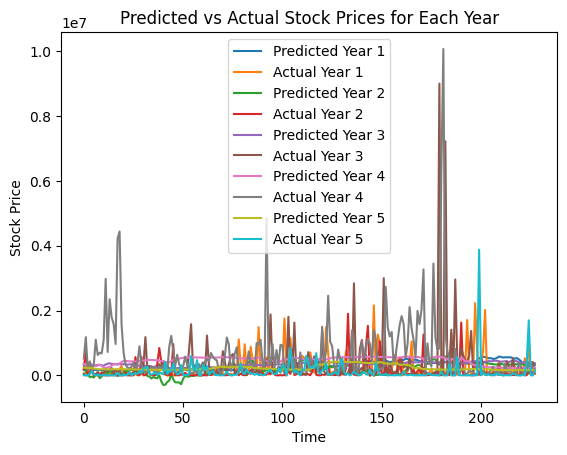

In [ ]:
# Define the number of years and months
num_years = 5
num_months = 12

# Divide the data into 5 years and 12 months
num_samples = len(data)
samples_per_month = num_samples // (num_years * num_months)

# Create lists to store the predictions and actual values for each year
predictions_yearly = []
actual_yearly = []

# Make predictions and calculate RMSE for each year
for i in range(num_years):
    # Select data for the current year
    start_index = i * num_months * samples_per_month
    end_index = (i + 1) * num_months * samples_per_month
    X_year = X[start_index:end_index]
    y_year = y[start_index:end_index]

    # Reshape data for LSTM
    X_year = np.reshape(X_year, (X_year.shape[0], X_year.shape[1], 1))

    # Make predictions for the current year
    predictions_year = model.predict(X_year)

    # Rescale predictions and actual values
    predictions_year = scaler.inverse_transform(np.concatenate((X_year[:,:,0], predictions_year), axis=1))[:, -1]
    y_year = scaler.inverse_transform(np.concatenate((X_year[:,:,0], y_year.reshape(-1,1)), axis=1))[:, -1]

    # Compute RMSE for the current year
    rmse_year = np.sqrt(mean_squared_error(y_year, predictions_year))
    print(f"Root Mean Squared Error (RMSE) for Year {i+1}: {rmse_year}")

    # Store predictions and actual values for the current year
    predictions_yearly.append(predictions_year)
    actual_yearly.append(y_year)

# Plot the predictions and actual values for each year
for i in range(num_years):
    plt.plot(predictions_yearly[i], label=f'Predicted Year {i+1}')
    plt.plot(actual_yearly[i], label=f'Actual Year {i+1}')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Predicted vs Actual Stock Prices for Each Year')
plt.show()


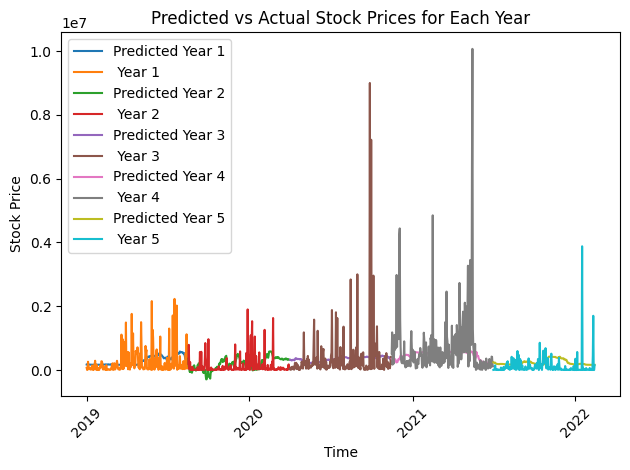

In [ ]:
import matplotlib.dates as mdates
from datetime import datetime, timedelta

# Define the start and end dates
start_date = datetime(2019, 1, 1)
end_date = datetime(2023, 12, 31)

# Create date range
date_range = [start_date + timedelta(days=i) for i in range((end_date - start_date).days + 1)]

# Plot the predictions and actual values for each year
for i in range(num_years):
    plt.plot(date_range[i*num_months*samples_per_month:(i+1)*num_months*samples_per_month], predictions_yearly[i], label=f'Predicted Year {i+1}')
    plt.plot(date_range[i*num_months*samples_per_month:(i+1)*num_months*samples_per_month], actual_yearly[i], label=f' Year {i+1}')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Predicted vs Actual Stock Prices for Each Year')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


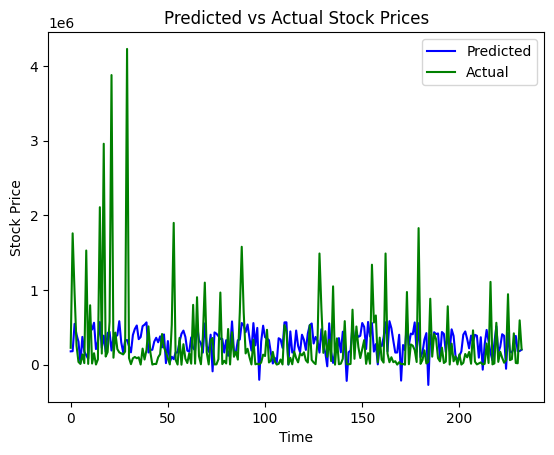

Root Mean Squared Error (RMSE) for Test Data: 543128.8954359117
Mean Absolute Error (MAE) for Test Data: 315976.4104643484
R^2 Score for Test Data: 0.003241968559183128


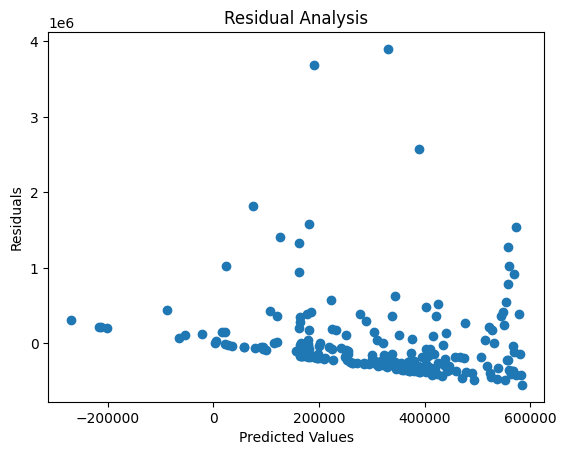

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Visualize the predicted values
plt.plot(predictions, label='Predicted', color='blue')
plt.plot(y_test, label='Actual', color='green')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Predicted vs Actual Stock Prices')
plt.show()

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("Root Mean Squared Error (RMSE) for Test Data:", rmse)

# Calculate MAE
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error (MAE) for Test Data:", mae)

# Calculate R^2 Score
r2 = r2_score(y_test, predictions)
print("R^2 Score for Test Data:", r2)

# Residual Analysis
residuals = y_test - predictions
plt.scatter(predictions, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()


Root Mean Squared Error (RMSE): The RMSE measures the average magnitude of the errors between predicted and actual values. A lower RMSE indicates better model performance. In this case, an RMSE of 543128.8954 suggests that, on average, the model's predictions are off by approximately $543,128.90.

Mean Absolute Error (MAE): The MAE also measures the average magnitude of the errors between predicted and actual values, but it does not penalize large errors as much as RMSE does. A lower MAE indicates better model performance. In this case, an MAE of 315976.4105 suggests that, on average, the model's predictions are off by approximately $315,976.41.

R^2 Score: The R^2 Score measures the proportion of the variance in the dependent variable (stock price) that is predictable from the independent variables (features) in the model. It ranges from 0 to 1, with higher values indicating better fit. An R^2 Score of 0.0032 suggests that only about 0.32% of the variance in stock price is explained by the model, which is quite low.